In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
def event_plot():
    matplotlib.rcParams['font.size'] = 8.0

    # Fixing random state for reproducibility
    np.random.seed(19680801)

    # create random data
    data1 = np.random.random([6, 50])

    # set different colors for each set of positions
    colors1 = ['C{}'.format(i) for i in range(6)]

    # set different line properties for each set of positions
    # note that some overlap
    lineoffsets1 = np.array([-15, -3, 1, 1.5, 6, 10])
    linelengths1 = [5, 2, 1, 1, 3, 1.5]

    fig, axs = plt.subplots(2, 2)

    # create a horizontal plot
    axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                        linelengths=linelengths1)

    # create a vertical plot
    axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                        linelengths=linelengths1, orientation='vertical')

    # create another set of random data.
    # the gamma distribution is only used fo aesthetic purposes
    data2 = np.random.gamma(4, size=[60, 50])

    # use individual values for the parameters this time
    # these values will be used for all data sets (except lineoffsets2, which
    # sets the increment between each data set in this usage)
    colors2 = 'black'
    lineoffsets2 = 1
    linelengths2 = 1

    # create a horizontal plot
    axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                        linelengths=linelengths2)


    # create a vertical plot
    axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                        linelengths=linelengths2, orientation='vertical')

    plt.show()

In [4]:
def bar_of_pie():
    # make figure and assign axis objects
    fig = plt.figure(figsize=(9, 5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.subplots_adjust(wspace=0)

    # pie chart parameters
    ratios = [.27, .56, .17]
    labels = ['Approve', 'Disapprove', 'Undecided']
    explode = [0.1, 0, 0]
    # rotate so that first wedge is split by the x-axis
    angle = -180 * ratios[0]
    ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
            labels=labels, explode=explode)

    # bar chart parameters

    xpos = 0
    bottom = 0
    ratios = [.33, .54, .07, .06]
    width = .2
    colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

    for j in range(len(ratios)):
        height = ratios[j]
        ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
        ypos = bottom + ax2.patches[j].get_height() / 2
        bottom += height
        ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
                 ha='center')

    ax2.set_title('Age of approvers')
    ax2.legend(('50-65', 'Over 65', '35-49', 'Under 35'))
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)

    # use ConnectionPatch to draw lines between the two plots
    # get the wedge data
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    bar_height = sum([item.get_height() for item in ax2.patches])

    # draw top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(4)
    ax2.add_artist(con)

    # draw bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(4)

    plt.show()    

In [7]:
def timeline():
    try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
        import urllib.request
        import json

        url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
        url += '?per_page=100'
        data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())

        dates = []
        names = []
        for item in data:
            if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
                dates.append(item['published_at'].split("T")[0])
                names.append(item['tag_name'])
        # Convert date strings (e.g. 2014-10-18) to datetime
        dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

    except Exception:
        # In case the above fails, e.g. because of missing internet connection
        # use the following lists as fallback.
        names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
                 'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
                 'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
                 'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

        dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
                 '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
                 '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
                 '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
                 '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
                 '2014-10-26', '2014-10-18', '2014-08-26']

        # Convert date strings (e.g. 2014-10-18) to datetime
        dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

    # Choose some nice levels
    levels = np.tile([-5, 5, -3, 3, -1, 1],
                     int(np.ceil(len(dates)/6)))[:len(dates)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
    ax.set(title="Matplotlib release dates")

    markerline, stemline, baseline = ax.stem(dates, levels,
                                             linefmt="C3-", basefmt="k-",
                                             use_line_collection=True)

    plt.setp(markerline, mec="k", mfc="w", zorder=3)

    # Shift the markers to the baseline by replacing the y-data by zeros.
    markerline.set_ydata(np.zeros(len(dates)))

    # annotate lines
    vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
    for d, l, r, va in zip(dates, levels, names, vert):
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                    textcoords="offset points", va=va, ha="right")

    # format xaxis with 4 month intervals
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y axis and spines
    ax.get_yaxis().set_visible(False)
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)

    ax.margins(y=0.1)
    plt.show()

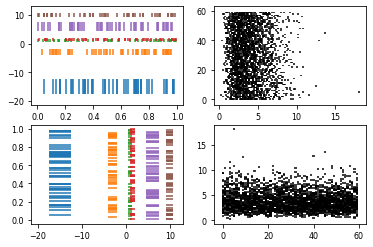

In [8]:
event_plot()

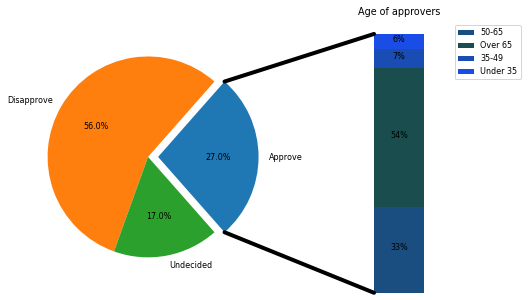

In [9]:
bar_of_pie()

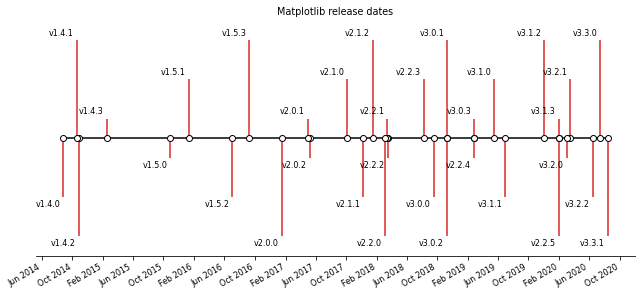

In [10]:
timeline()